In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

## 이진 분류의 평가 지표
---

### 불균형 데이터
#### 클래스의 비율이 한쪽으로 치우처진 데이터를 말한다.
#### ex) 클릭된 광고(1%), 클릭되지 않은 광고(99%)

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

#### 실제 모델과 비교하기 위해 가단한 규칙을 지원하는 모델
#### DummyClassifier
- strategy :
    - stratified : 클래스 레이블 비율에 맞게 예측한다.
    - most_frequent : 가장 많은 레이블을 예측한다.

#### DummyRegressor 
- strategy :
    - mean : 평균 값을 예측한다.
    - median : 중간값을 예측한다.

In [3]:
# 항상 다수의 클래스를 예측하는 모델을 사용함.
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("에측된 레이블의 레이블", np.unique(pred_most_frequent))
print(f"test score : {dummy_majority.score(X_test, y_test):0.3f}")

# 모든 클래스를 False 로 예측했지만 정확도는 약 90%나 된다.

에측된 레이블의 레이블 [False]
test score : 0.896


In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"test score : {tree.score(X_test, y_test):0.3f}")

# DecisionTreeClassfier 의 성능이 조금 높다.
# 이로써 DecisionTreeClassfier 의 성능이 좋은 편이 아니라는 것을 알 수 있다.

test score : 0.918


In [5]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"dummy score : {dummy.score(X_test, y_test):0.3f}")

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"logreg score : {logreg.score(X_test, y_test):0.3f}")

dummy score : 0.796
logreg score : 0.984


## 오차행렬

In [6]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬 : \n", confusion)

오차 행렬 : 
 [[402   1]
 [  6  41]]


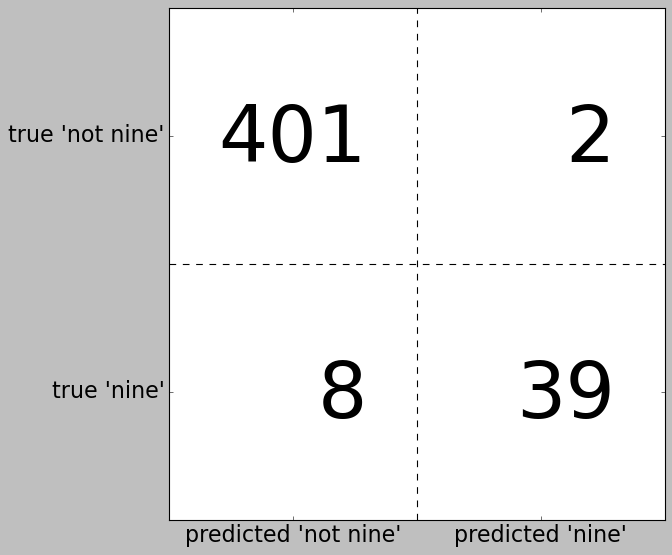

In [7]:
mglearn.plots.plot_confusion_matrix_illustration()

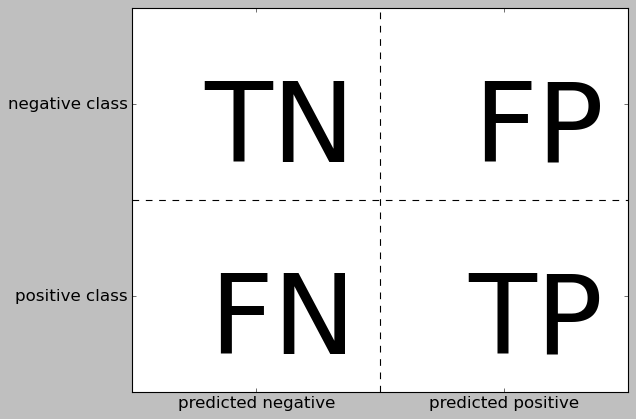

In [8]:
mglearn.plots.plot_binary_confusion_matrix()

In [9]:
print("빈도 기반 더미 모델 :")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델 :")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리 : ")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀 :")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델 :
[[403   0]
 [ 47   0]]

무작위 더미 모델 :
[[370  33]
 [ 45   2]]

결정 트리 : 
[[390  13]
 [ 24  23]]

로지스틱 회귀 :
[[402   1]
 [  6  41]]


### 정확도 = (TP+TN) / (TP+TN+FP+FN)
- 정확하게 분류된 샘플의 비율

### 정밀도(precision) = TP / (TP+FP)
- 예측된 것(TP+FP) 중 얼마나 많은 샘플이 진짜 양성(TP) 인지

### 재현율(recall) = TP / (TP+FN)
- 전체 양성 샘플(TP+FN) 중 에서 얼마나 많은 샘플이 양성 클래스(TP) 로 분류 되었는지

<br>

### f1-점수(f1-score, F) = 2 * (정밀도 * 재현율) / (정밀도 + 재현율) 

In [10]:
from sklearn.metrics import f1_score
print(f"빈도 기반 더미 모델의 f1 score : {f1_score(y_test, pred_most_frequent)}")
print(f"무작위 더미 모델의 f1 score : {f1_score(y_test, pred_dummy):0.2f}")
print(f"트리 모델의 f1 score : {f1_score(y_test, pred_tree):0.2f}")
print(f"로지스틱 회귀 모델의 f1 score : {f1_score(y_test, pred_logreg):.2f}")

빈도 기반 더미 모델의 f1 score : 0.0
무작위 더미 모델의 f1 score : 0.05
트리 모델의 f1 score : 0.55
로지스틱 회귀 모델의 f1 score : 0.92


In [11]:
# 한꺼번에 출력하기.
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["9 아님", '9'], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [12]:
print(classification_report(y_test, pred_dummy, target_names=["9 아님", '9']))

              precision    recall  f1-score   support

        9 아님       0.89      0.92      0.90       403
           9       0.06      0.04      0.05        47

    accuracy                           0.83       450
   macro avg       0.47      0.48      0.48       450
weighted avg       0.80      0.83      0.82       450



In [13]:
print(classification_report(y_test, pred_logreg, target_names=["9 아님", '9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



## 불확실성 고려
---
### 임계값 바꾸기

In [14]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X,y = make_blobs(n_samples=(400,50), cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

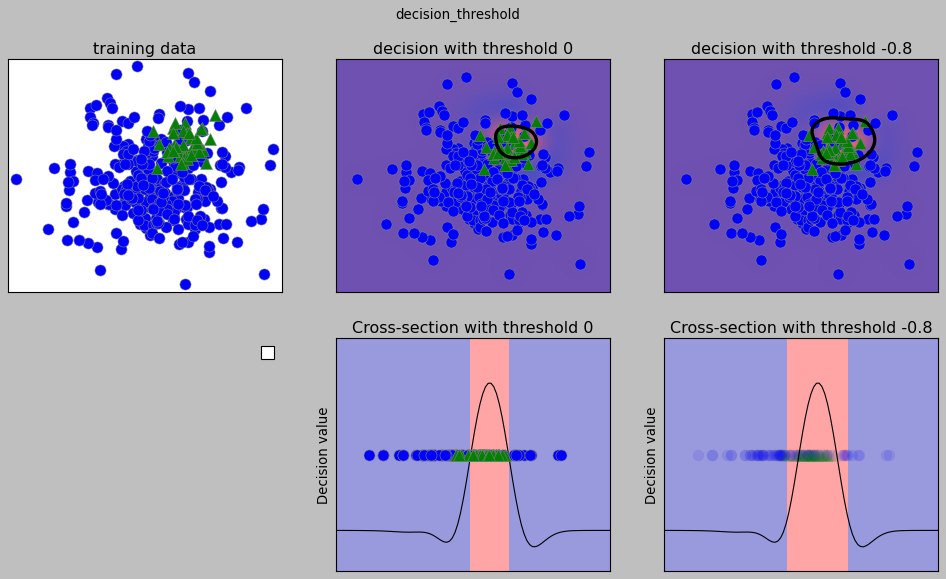

In [15]:
mglearn.plots.plot_decision_threshold()

In [16]:
print(classification_report(y_test, svc.predict(X_test)))

# 실제 의료상황이라면 보수적으로 판단해야하기 때문에
# 양성으로 잘못판단하는 경우가 생기더라도 양성이지만 음성으로 판단하는 경우는 피해야한다.
# 즉 1의 재현율을 높일 필요가 있다.

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [17]:
# 임계값을 바꾼다. 
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



### 정밀도-재현율 곡선과 ROC 곡선
- 우상향이면 좋은 것이다.

In [18]:
from sklearn.metrics import precision_recall_curve



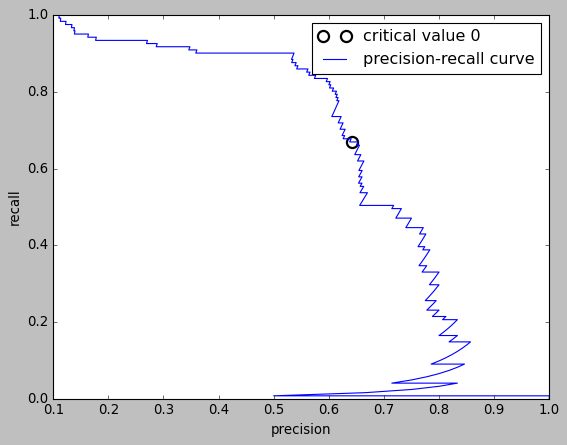

In [19]:
X,y = make_blobs(n_samples=(4000,500), cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

svc = SVC(gamma=0.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = 'critical value 0', 
         fillstyle = "none", c = 'k', mew=2)
plt.plot(precision, recall, label='precision-recall curve')
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

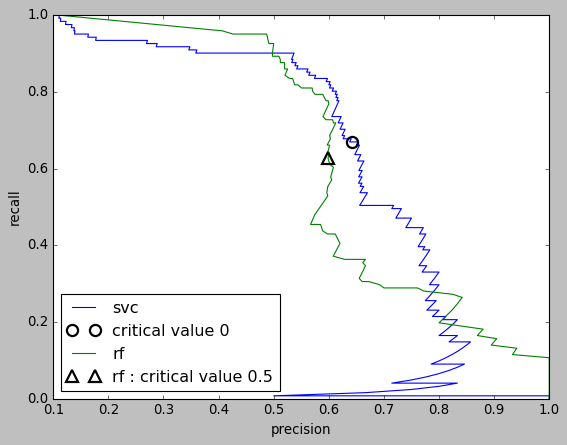

In [20]:
# RandomForestClassifier 에서의 정밀도-재현율 곡선
from xml.etree.ElementPath import prepare_predicate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

#RandomForestClassifier 에서는 predict_decison 을 제공하지 않고 각각의 클래스의 확률 데이터를 제공한다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = 'critical value 0', 
         fillstyle = "none", c = 'k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^',
         c='k', markersize=10, label='rf : critical value 0.5', fillstyle='none', mew=2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc='best')

# 극단점인 경우는 제외하고 svc의 성과가 더 좋은 것을 확인할 수 있다.

In [21]:
# f1 score 의 결과
print("랜덤 포레스트의 f1_score : ", f1_score(y_test, rf.predict(X_test)))
print("svc 의 f1_score : ", f1_score(y_test, svc.predict(X_test)))

랜덤 포레스트의 f1_score :  0.6097560975609757
svc 의 f1_score :  0.6558704453441295


### 평균 정밀도
- 정밀도-재현율 곡선의 아랫부분 면적

In [22]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print(f"랜덤 포레스트의 평균 정밀도 : {ap_rf:0.3f}")
print(f"svc의 평균 정밀도 : {ap_svc:0.3f}")

랜덤 포레스트의 평균 정밀도 : 0.660
svc의 평균 정밀도 : 0.666


## ROC 와 AUC
---
### TPR(진짜 양성 비율) = 재현율
### FPR(거짓 양성 비율) : 전체 음성 샘플 중 거짓 양성으로 분류된 비율
<br>

### ROC 는 TPR, FPR 로 그린 그래프이다.
### 좌상향이면 좋은 것이다.

<br>

### AUC 는 ROC 의 아래 면적이다.

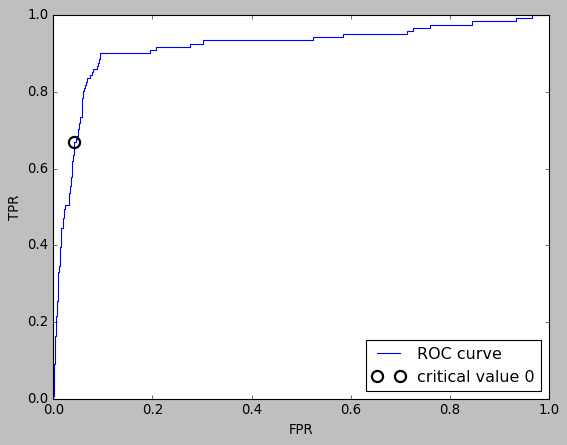

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel("FPR")
plt.ylabel("TPR")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='critical value 0', fillstyle='none',
         c='k', mew=2)
plt.legend(loc=4)
plt.show()

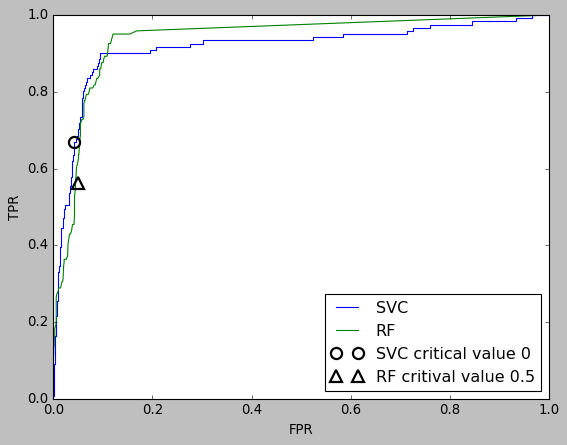

In [27]:
# 랜덤 포레스트와 SVC 의 ROC 곡선 비교

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='SVC')
plt.plot(fpr_rf, tpr_rf, label='RF')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label='SVC critical value 0', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf -0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF critival value 0.5", fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

### AUC

#### 불균형 데이터에서는 무작위 예측의 auc가 거의 항상 0.5 이므로 (FPR 과 TPR가 거의 같아지므로)
#### 불균형 데이터에서는 정확도 보다 AUC 가 더 좋은 지표가 된다.

In [29]:
# AUC

from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(f"random forest AUC : {rf_auc:0.3f}")
print(f"SVC AUC : {svc_auc:0.3f}")

random forest AUC : 0.937
SVC AUC : 0.916


gamma = 1, 정확도 = 0.896, auc = 0.500
gamma = 0.1, 정확도 = 0.896, auc = 0.958
gamma = 0.01, 정확도 = 0.896, auc = 1.000


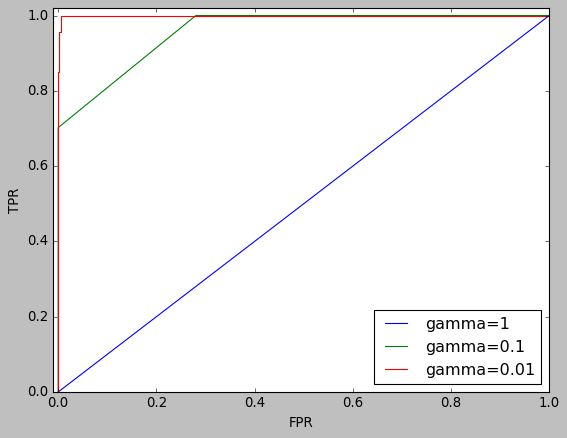

In [32]:
# 불균형 데이터에서의 AUC
# gamma = 0.01 일 때 모든 데이터를 False로 분류했기 때문에 auc가 1이지만 정확도는 0.896이다.
# 이는 gamma 가 0.01일 때 좋은 성과를 얻었다고 할 수 있지만 의미있는 예측은 아니므로 임계값을 조정해야한다는 뜻이다.

y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()

for gamma in [1, 0.1, 0.01] :
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print(f"gamma = {gamma}, 정확도 = {accuracy:0.3f}, auc = {auc:0.3f}")
    plt.plot(fpr, tpr, label=f"gamma={gamma}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0, 1.02)
plt.legend(loc='best')